In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import data set

In [2]:
df = pd.read_csv('weight-height.csv')

# Preprocessing Data 

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
label = LabelEncoder()

In [6]:
df.Gender = label.fit_transform(df['Gender'])

In [7]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [8]:
df.Gender.value_counts()

1    5000
0    3555
Name: Gender, dtype: int64

# Seperate x(Gender, Height) and y (y=Weight)

# x = Gender, y = Weight

In [9]:
x = df[['Gender']]
y = df[['Weight']]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.30,random_state=42)

In [12]:
xtrain.head()

,Gender
553,1
1397,1
7934,0
8367,0
3320,1


# Apply Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
l_reg = LinearRegression()

In [15]:
l_reg.fit(xtrain,ytrain)

LinearRegression()

In [16]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [17]:
pred = l_reg.predict(xtest)

In [18]:
np.array(pred)

array([[135.56694384],
       [186.71262166],
       [186.71262166],
       ...,
       [135.56694384],
       [186.71262166],
       [135.56694384]])

In [19]:
accuracy = l_reg.score(xtest,ytest)

In [20]:
accuracy

0.6355053557190797

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
mse = mean_squared_error(ytest,pred)

In [23]:
mse

375.142517644801

In [24]:
from sklearn.metrics import mean_absolute_error

In [25]:
mae = mean_absolute_error(ytest,pred)

In [26]:
mae

15.477583120159887

# KNN Regression

In [27]:
from sklearn.neighbors import KNeighborsRegressor

In [28]:
kneigh = KNeighborsRegressor()

In [29]:
kneigh.fit(xtrain,ytrain)

KNeighborsRegressor()

In [30]:
knn_reg_pred = kneigh.predict(xtest)

In [31]:
knn_reg_pred

array([[148.39741828],
       [179.34509034],
       [179.34509034],
       ...,
       [148.39741828],
       [179.34509034],
       [148.39741828]])

In [32]:
knn_accuracy = kneigh.score(xtest,ytest)

In [33]:
knn_accuracy

0.5320187446732645

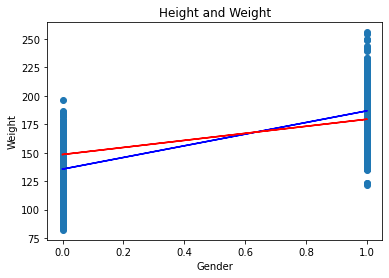

In [34]:
plt.scatter(xtest,ytest)
plt.xlabel('Gender')
plt.ylabel('Weight')
plt.title('Height and Weight')
plt.plot(xtest.squeeze(),l_reg.predict(xtest), color = 'Blue')
plt.plot(xtest.squeeze(),kneigh.predict(xtest), color = 'Red')

In [35]:
knn_mse = mean_squared_error(ytest,knn_reg_pred)

In [36]:
knn_mse

481.65225220302574

# Tuning

# Apply Randomized Search CV to select best K vlaue

In [37]:
#RandomizedSearchCV

In [38]:
Neighbours = np.random.randint(1,10,8)
weights = ['uniform', 'distance']
algorithm = ['auto','ball_tree','kd_tree','brute']
leaf_size = np.random.randint(1,50,32)
p = [1,2,3]
metric = ['minkowski']

In [39]:
grids = {
    'n_neighbors': Neighbours,
    'weights': weights,
    'algorithm' : algorithm,
    'leaf_size' : leaf_size,
    'p' : p,
    'metric':metric
}

In [40]:
print(grids)

{'n_neighbors': array([8, 6, 1, 8, 4, 1, 9, 8]), 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': array([11, 21, 17, 10,  8, 35, 32, 11, 22,  1,  5, 10,  1, 26, 21,  2,  3,
       20,  6, 24,  3, 25, 49, 31, 10, 30, 49, 33,  3, 29,  8, 10]), 'p': [1, 2, 3], 'metric': ['minkowski']}


# Randomized Search CV 

In [41]:
from sklearn.model_selection import RandomizedSearchCV

In [42]:
randos = RandomizedSearchCV(estimator=kneigh,param_distributions=grids,n_iter=400,cv=3)

In [43]:
randos

RandomizedSearchCV(cv=3, estimator=KNeighborsRegressor(), n_iter=400,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': array([11, 21, 17, 10,  8, 35, 32, 11, 22,  1,  5, 10,  1, 26, 21,  2,  3,
       20,  6, 24,  3, 25, 49, 31, 10, 30, 49, 33,  3, 29,  8, 10]),
                                        'metric': ['minkowski'],
                                        'n_neighbors': array([8, 6, 1, 8, 4, 1, 9, 8]),
                                        'p': [1, 2, 3],
                                        'weights': ['uniform', 'distance']})

In [44]:
randos.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=KNeighborsRegressor(), n_iter=400,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': array([11, 21, 17, 10,  8, 35, 32, 11, 22,  1,  5, 10,  1, 26, 21,  2,  3,
       20,  6, 24,  3, 25, 49, 31, 10, 30, 49, 33,  3, 29,  8, 10]),
                                        'metric': ['minkowski'],
                                        'n_neighbors': array([8, 6, 1, 8, 4, 1, 9, 8]),
                                        'p': [1, 2, 3],
                                        'weights': ['uniform', 'distance']})

In [45]:
randos.best_params_

{'weights': 'distance',
 'p': 1,
 'n_neighbors': 9,
 'metric': 'minkowski',
 'leaf_size': 1,
 'algorithm': 'auto'}

In [46]:
randos.best_score_

0.58280760193163

In [47]:
ran = randos.best_estimator_

In [48]:
ran

KNeighborsRegressor(leaf_size=1, n_neighbors=9, p=1, weights='distance')

In [49]:
ran.fit(xtrain,ytrain)

KNeighborsRegressor(leaf_size=1, n_neighbors=9, p=1, weights='distance')

In [50]:
knn_reg_tuning_pred = ran.predict(xtest)

In [51]:
knn_reg_tuning_pred

array([[141.13831952],
       [182.10845839],
       [182.10845839],
       ...,
       [141.13831952],
       [182.10845839],
       [141.13831952]])

In [52]:
knn_accuracy_tun = ran.score(xtest,ytest)

In [53]:
knn_accuracy_tun

0.6067980938855837

In [54]:
knn_mse_tun = mean_squared_error(ytest,knn_reg_tuning_pred)

In [55]:
knn_mse_tun

404.68839615874197

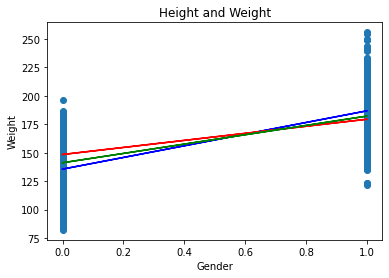

In [56]:
plt.scatter(xtest,ytest)
plt.xlabel('Gender')
plt.ylabel('Weight')
plt.title('Height and Weight')
plt.plot(xtest.squeeze(),l_reg.predict(xtest), color = 'Blue')
plt.plot(xtest.squeeze(),kneigh.predict(xtest), color = 'Red')
plt.plot(xtest.squeeze(),ran.predict(xtest),color = 'Green')

# x=Height, y = Weight

In [57]:
x1 = df[['Height']]

In [58]:
xtrain,xtest,ytrain,ytest = train_test_split(x1,y,test_size=.30,random_state=40)

In [59]:
xtrain.head()

,Height
6699,65.074119
3507,67.089302
7856,72.264748
4000,68.662144
6542,65.095308


In [60]:
l_reg.fit(xtrain,ytrain)

LinearRegression()

In [61]:
pred_1 = l_reg.predict(xtest)

In [62]:
np.array(pred_1)

array([[189.6542635 ],
       [169.00465826],
       [170.26696497],
       ...,
       [122.94117922],
       [191.20082035],
       [133.79815519]])

In [63]:
accuracy_1 = l_reg.score(xtest,ytest)

In [64]:
accuracy_1

0.8528799863886187

In [65]:
mse_1 = mean_squared_error(ytest,pred_1)

In [66]:
mse_1

153.94522277110227

In [67]:
mae_1 = mean_absolute_error(ytest,pred_1)

In [68]:
mae_1

9.910404461285761

# KNN model Linear regression

In [69]:
from sklearn.neighbors import KNeighborsRegressor

In [70]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [71]:
kneigh.fit(xtrain,ytrain)

KNeighborsRegressor()

In [72]:
knn_pred_1 = kneigh.predict(xtest)

In [73]:
knn_pred_1

array([[191.13291676],
       [166.40551102],
       [176.37907024],
       ...,
       [122.6278033 ],
       [194.14607378],
       [137.0226128 ]])

In [74]:
knn_accuracy_1 = kneigh.score(xtest,ytest)

In [75]:
knn_accuracy_1

0.8286940373463139

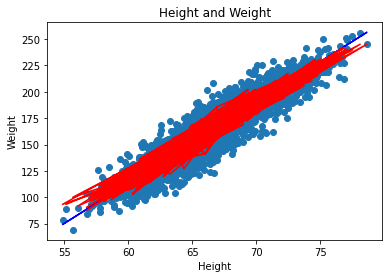

In [76]:
plt.scatter(xtest,ytest)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height and Weight')
plt.plot(xtest.squeeze(),l_reg.predict(xtest), color = 'Blue')
plt.plot(xtest.squeeze(),kneigh.predict(xtest), color = 'Red')

In [77]:
mse_knn_1 = mean_squared_error(ytest,knn_pred_1)

In [78]:
mse_knn_1

179.25320923637898

# Tuning

In [79]:
randos = RandomizedSearchCV(estimator=kneigh,param_distributions=grids,n_iter=400,cv=3)

In [80]:
randos

RandomizedSearchCV(cv=3, estimator=KNeighborsRegressor(), n_iter=400,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': array([11, 21, 17, 10,  8, 35, 32, 11, 22,  1,  5, 10,  1, 26, 21,  2,  3,
       20,  6, 24,  3, 25, 49, 31, 10, 30, 49, 33,  3, 29,  8, 10]),
                                        'metric': ['minkowski'],
                                        'n_neighbors': array([8, 6, 1, 8, 4, 1, 9, 8]),
                                        'p': [1, 2, 3],
                                        'weights': ['uniform', 'distance']})

In [81]:
randos.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=KNeighborsRegressor(), n_iter=400,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': array([11, 21, 17, 10,  8, 35, 32, 11, 22,  1,  5, 10,  1, 26, 21,  2,  3,
       20,  6, 24,  3, 25, 49, 31, 10, 30, 49, 33,  3, 29,  8, 10]),
                                        'metric': ['minkowski'],
                                        'n_neighbors': array([8, 6, 1, 8, 4, 1, 9, 8]),
                                        'p': [1, 2, 3],
                                        'weights': ['uniform', 'distance']})

In [82]:
randos.best_params_

{'weights': 'uniform',
 'p': 3,
 'n_neighbors': 9,
 'metric': 'minkowski',
 'leaf_size': 25,
 'algorithm': 'brute'}

In [83]:
randos.best_score_

0.8371609024612061

In [84]:
ran_1 = randos.best_estimator_

In [85]:
ran_1

KNeighborsRegressor(algorithm='brute', leaf_size=25, n_neighbors=9, p=3)

In [86]:
ran_1.fit(xtrain,ytrain)

KNeighborsRegressor(algorithm='brute', leaf_size=25, n_neighbors=9, p=3)

In [87]:
accuracy_1 = ran_1.score(xtest,ytest)

In [88]:
accuracy_1

0.8413258366760981

In [89]:
pred_tun_1 = ran_1.predict(xtest)

In [90]:
pred_tun_1

array([[192.12814078],
       [173.0487974 ],
       [171.81812719],
       ...,
       [120.70411996],
       [199.06672466],
       [132.0643356 ]])

In [91]:
mse_knn_tun_1 = mean_squared_error(ytest,pred_tun_1)

In [92]:
mse_knn_tun_1

166.0353939705363

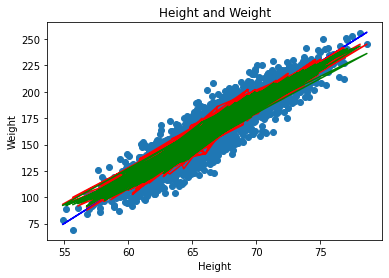

In [93]:
plt.scatter(xtest,ytest)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height and Weight')
plt.plot(xtest.squeeze(),l_reg.predict(xtest), color = 'Blue')
plt.plot(xtest.squeeze(),kneigh.predict(xtest), color = 'Red')
plt.plot(xtest.squeeze(),ran_1.predict(xtest), color = 'Green')

# Step:2: KNN Classifier:

In [94]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [95]:
x2 = df.drop('Gender',axis=1)
y1 = df['Gender']

In [96]:
x2.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [97]:
xtrain,xtest,ytrain,ytest = train_test_split(x2,y1,random_state=42,test_size=.30)

In [98]:
xtrain.shape

(5988, 2)

In [99]:
ytrain.shape

(5988,)

In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
neig_clf = KNeighborsClassifier()

In [102]:
neig_clf.fit(xtrain,ytrain)

KNeighborsClassifier()

In [103]:
neig_clf_predict = neig_clf.predict(xtest)

In [104]:
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix, plot_roc_curve

In [105]:
print(classification_report(ytest,neig_clf_predict))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1066
           1       0.92      0.93      0.93      1501

    accuracy                           0.91      2567
   macro avg       0.91      0.91      0.91      2567
weighted avg       0.91      0.91      0.91      2567



In [106]:
confusion_matrix(ytest,neig_clf_predict)

array([[ 945,  121],
       [ 102, 1399]], dtype=int64)

In [107]:
accuracy_score(ytest,neig_clf_predict)

0.9131281651733542

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


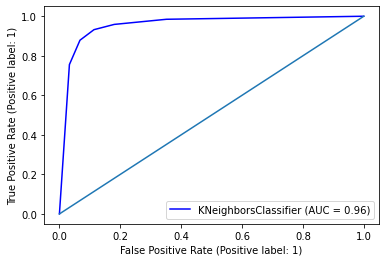

In [108]:
plot_roc_curve(neig_clf,xtest,ytest, color = 'Blue')
plt.plot([0,1],[0,1])

# Clasifier Tuning

In [109]:
randos_clf = RandomizedSearchCV(estimator=neig_clf, param_distributions=grids, n_iter=200, cv=3)

In [110]:
randos_clf

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=200,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': array([11, 21, 17, 10,  8, 35, 32, 11, 22,  1,  5, 10,  1, 26, 21,  2,  3,
       20,  6, 24,  3, 25, 49, 31, 10, 30, 49, 33,  3, 29,  8, 10]),
                                        'metric': ['minkowski'],
                                        'n_neighbors': array([8, 6, 1, 8, 4, 1, 9, 8]),
                                        'p': [1, 2, 3],
                                        'weights': ['uniform', 'distance']})

In [111]:
randos_clf.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=200,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': array([11, 21, 17, 10,  8, 35, 32, 11, 22,  1,  5, 10,  1, 26, 21,  2,  3,
       20,  6, 24,  3, 25, 49, 31, 10, 30, 49, 33,  3, 29,  8, 10]),
                                        'metric': ['minkowski'],
                                        'n_neighbors': array([8, 6, 1, 8, 4, 1, 9, 8]),
                                        'p': [1, 2, 3],
                                        'weights': ['uniform', 'distance']})

In [112]:
randos_clf.best_params_

{'weights': 'uniform',
 'p': 3,
 'n_neighbors': 8,
 'metric': 'minkowski',
 'leaf_size': 21,
 'algorithm': 'kd_tree'}

In [113]:
randos_clf.best_score_

0.9111556446225785

In [114]:
ran_clf = randos_clf.best_estimator_

In [115]:
ran_clf.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=21, n_neighbors=8, p=3)

In [116]:
neig_clf_predict_tun = ran_clf.predict(xtest)

In [117]:
neig_clf_predict_tun

array([0, 1, 1, ..., 0, 1, 0])

In [118]:
print(classification_report(ytest,neig_clf_predict_tun))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1066
           1       0.93      0.93      0.93      1501

    accuracy                           0.92      2567
   macro avg       0.92      0.92      0.92      2567
weighted avg       0.92      0.92      0.92      2567



In [119]:
confusion_matrix(ytest,neig_clf_predict_tun)

array([[ 967,   99],
       [ 110, 1391]], dtype=int64)

In [120]:
accuracy_score(ytest,neig_clf_predict_tun)

0.9185820023373588

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


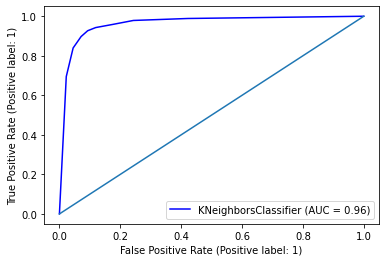

In [121]:
plot_roc_curve(ran_clf,xtest,ytest, color = 'Blue')
plt.plot([0,1],[0,1])